# Source :  
These dataset, I captured it from https://bodysize.date by webscraping method and label by using Body Type Calculator from https://goodcalculators.com/body-shape-calculator/

# Objective :   
To recommend women who should you ware dress like the actress from hollywood.

# Data Set Information :
These data are the result of a women body types.
There are 6 columns information.  
 1. URL 
 2. Img_URL  
 3. Bust  
 4. Waist  
 5. Hip  
 6. Class (a women shape types)

Therefore, I will use 3 features which are Bust,Waist and Hip to classify the label or women shape types.


# Import important library

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 1 LOAD DATASET

In [2]:
df = pd.read_csv('womenbodyshape.csv')
df.sample(5)

,URL,Img_URL,Bust,Waist,Hip,Class
217,https://bodysize.date/natalie-hall/,https://bodysize.date/wp-content/uploads/2020/...,34.0,25.0,34.0,Hourglass
298,https://bodysize.date/ona-grauer/,https://bodysize.date/wp-content/uploads/2020/...,34.0,23.0,33.0,Hourglass
165,https://bodysize.date/juliette-binoche/,https://bodysize.date/wp-content/uploads/2020/...,34.0,25.0,34.0,Hourglass
535,https://bodysize.date/susan-coffey/,https://bodysize.date/wp-content/uploads/2020/...,32.0,25.0,35.0,Pear or triangle
62,https://bodysize.date/kendall-jenner/,https://bodysize.date/wp-content/uploads/2020/...,34.0,24.0,34.0,Hourglass


In [3]:
#select data only relevant feature and class which can be use for modeling.
dataset = df[["Bust","Waist","Hip","Class"]]
dataset.head(3)

,Bust,Waist,Hip,Class
0,33.0,25.0,34.0,Rectangle
1,34.0,25.0,33.0,Rectangle
2,36.0,25.0,35.0,Hourglass


# 2.Summarize the Dataset

In [4]:
print(dataset.shape) #dataset contain 652 rows and 4 columns

(652, 4)


# 3.Statistical Summary

In [5]:
print(dataset.describe())

Bust       Waist         Hip
count  652.000000  652.000000  652.000000
mean    34.671012   25.163344   34.795721
std      2.047321    1.971515    2.195893
min     28.000000   20.000000   28.000000
25%     34.000000   24.000000   34.000000
50%     34.000000   25.000000   34.000000
75%     36.000000   26.000000   35.000000
max     52.000000   49.000000   59.000000


## Class Distribution
See the distribution or total in each class label in the dataset.

In [6]:
print(dataset.groupby('Class').size())

Class
Hourglass            381
Inverted triangle     57
Pear or triangle      75
Rectangle            139
dtype: int64


In [7]:
dataset.info() #no mising data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bust    652 non-null    float64
 1   Waist   652 non-null    float64
 2   Hip     652 non-null    float64
 3   Class   652 non-null    object 
dtypes: float64(3), object(1)
memory usage: 20.5+ KB


# 4. Data Visualization  
- Univariate plots to better understand each attribute.  
- Multivariate plots to better understand the relationships between attributes.

## Univariate

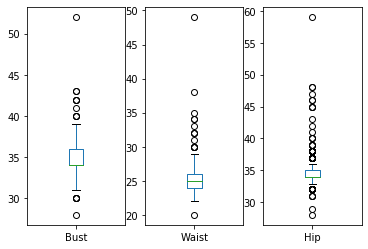

In [8]:
dataset.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

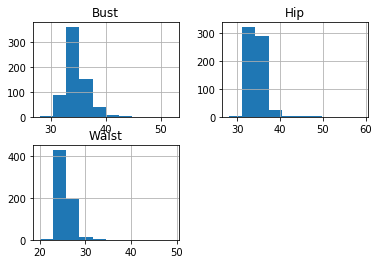

In [9]:
dataset.hist()
plt.show()

## Multivariate 

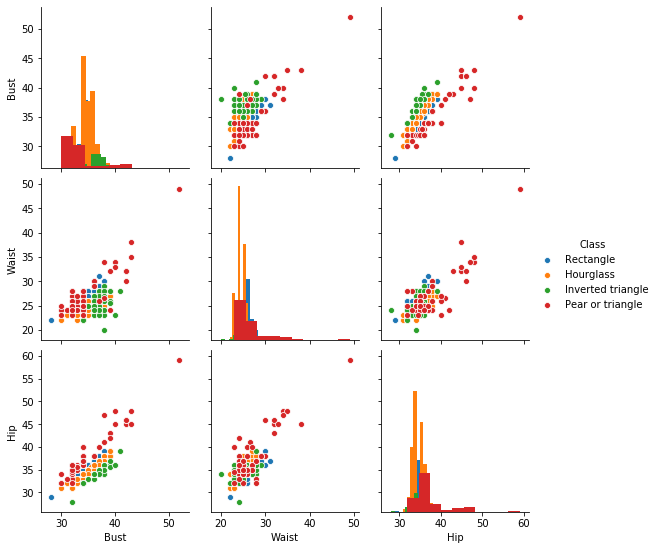

In [10]:
sns.pairplot(dataset,hue='Class',diag_kind='hist')
plt.show()

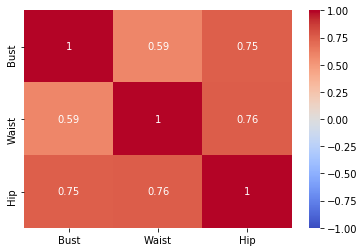

In [11]:
sns.heatmap(dataset.corr(),vmin=-1,cmap='coolwarm',annot=True)

# 5. Data Preparation before modeling
 - Label encoder to change categorical data to numerical data for label.
 - Normalization to make same scale.

## 5.1 Label Encoder

In [12]:
le = LabelEncoder()
dataset['class_encode'] = le.fit_transform(dataset['Class'])
dataset.head(3)

,Bust,Waist,Hip,Class,class_encode
0,33.0,25.0,34.0,Rectangle,3
1,34.0,25.0,33.0,Rectangle,3
2,36.0,25.0,35.0,Hourglass,0


In [13]:
#crosstab check which nuber mapped the class
# 0 = "Hourglass"
# 1 = "Inverted triangle"
# 2 = "Pear or triangle"
# 3 = "Rectangle"
pd.crosstab(dataset['class_encode'], dataset['Class'])

Class,Hourglass,Inverted triangle,Pear or triangle,Rectangle
class_encode,,,,
0,381,0,0,0
1,0,57,0,0
2,0,0,75,0
3,0,0,0,139


## 5.2 Standard nomalization

In [14]:
dataset[["Bust","Waist","Hip"]] = pd.DataFrame(StandardScaler().fit_transform(dataset[["Bust","Waist","Hip"]]))
dataset.sample(5)

,Bust,Waist,Hip,Class,class_encode
14,-0.328003,0.424698,0.093099,Rectangle,3
189,-1.305639,-0.590529,-1.274136,Hourglass,0
17,0.649633,-0.082915,0.548844,Hourglass,0
414,0.649633,0.424698,0.548844,Hourglass,0
5,0.160815,-0.590529,0.093099,Hourglass,0


# 6. Evaluate Some Algorithms
- Separate out a validation dataset.
- Set-up the test harness to use 10-fold cross validation.
- Build 5 different models to predict type of women shapes
- Select the best model.

## 6.1 Create a Validation Dataset

- Create training data in the X_train and Y_train for preparing models   
- Create X_validation and Y_validation sets that we can use later.

In [15]:
X = dataset[["Bust","Waist","Hip"]]
Y = dataset[["class_encode"]]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

I will use the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

In [16]:
seed = 7 
scoring = 'accuracy'

## 6.2 Build Models
Let’s evaluate 6 different algorithms:

- Logistic Regression (LR)
- K-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

In [17]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# print(models)
# evaluate each model in turn
results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LR: 0.913570 (0.033680)
KNN: 0.921299 (0.038901)
CART: 0.948258 (0.035289)
NB: 0.725472 (0.055334)
SVM: 0.926996 (0.050784)


#### See the above accuracy mean result of models is Classification and Regression Trees (CART).
Compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

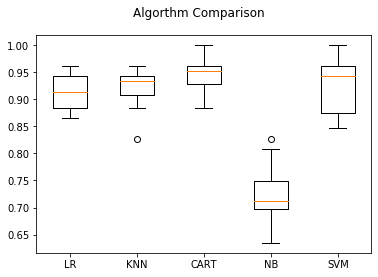

In [18]:
# Compare Algos
fig = plt.figure()
fig.suptitle('Algorthm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 7. Make Predictions
Using Classification and Regression Trees (CART) due to cross-validatation accuracy result as the above is Support Vector Machines (SVM).  
So,I will summarize the results as a final accuracy score, a confusion matrix and a classification report.


In [24]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

predictions = dtree.predict(X_validation)
print("Accuracy = ",accuracy_score(Y_validation, predictions))
print("*"*80)
print(confusion_matrix(Y_validation, predictions))
print("*"*80)
print(classification_report(Y_validation, predictions))

Accuracy =  0.9465648854961832
********************************************************************************
[[73  0  0  0]
 [ 2 10  0  1]
 [ 2  0 16  0]
 [ 0  0  2 25]]
********************************************************************************
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        73
           1       1.00      0.77      0.87        13
           2       0.89      0.89      0.89        18
           3       0.96      0.93      0.94        27

    accuracy                           0.95       131
   macro avg       0.95      0.90      0.92       131
weighted avg       0.95      0.95      0.95       131



## Another way to make better visualization.

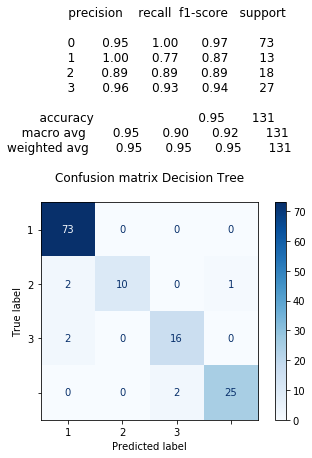

In [26]:
# Anothor option to visulize the matrix
disp = plot_confusion_matrix(dtree, X_validation, Y_validation,
                                 display_labels=[1,2,3],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title(classification_report(Y_validation,predictions)+"\nConfusion matrix Decision Tree\n")
plt.savefig('dtree.png',bbox_inches="tight")
plt.show()

# As the accuracy score of Classification and Regression Tree model in cross-validation we will use this model to actual production.

# 8. Apply model to recommend women who you should wear like them

## 8.1 Input new data

In [27]:
# define input
new_input = [[34, 24,35]]

## 8.2 Predict new data

In [28]:
#get prediction for new input
new_output = dtree.predict(new_input)

In [29]:
# 0 = "Hourglass"
# 1 = "Inverted triangle"
# 2 = "Pear or triangle"
# 3 = "Rectangle"
output = { 0 : "Hourglass",
 1 : "Inverted triangle",
 2 : "Pear or triangle",
 3 : "Rectangle"}

predict_output = output[int(new_output)]
print(predict_output)

Pear or triangle


## 8.3 Visualize the recommendation who you should ware like them.

In [30]:
from IPython.display import HTML

In [31]:
def to_html_img(url, alt=None, width=100):
    if alt==None:
        alt=''
    return f'<img alt="{alt}" src="{url}" width="{width}"/>'

In [32]:
df['Img_URL']=df.apply(lambda r: to_html_img(r['Img_URL'], 100), axis=1)
df.head()

,URL,Img_URL,Bust,Waist,Hip,Class
0,https://bodysize.date/tina-ahuja/,"<img alt=""100"" src=""https://bodysize.date/wp-c...",33.0,25.0,34.0,Rectangle
1,https://bodysize.date/alison-lohman/,"<img alt=""100"" src=""https://bodysize.date/wp-c...",34.0,25.0,33.0,Rectangle
2,https://bodysize.date/zoe-mclellan/,"<img alt=""100"" src=""https://bodysize.date/wp-c...",36.0,25.0,35.0,Hourglass
3,https://bodysize.date/demi-moore/,"<img alt=""100"" src=""https://bodysize.date/wp-c...",34.0,24.0,33.0,Hourglass
4,https://bodysize.date/jessica-alba/,"<img alt=""100"" src=""https://bodysize.date/wp-c...",34.0,24.0,34.0,Hourglass


In [33]:
boo = dataset['Class'] == predict_output


In [34]:
#Sample 10 persons you should ware dress like her.
HTML(df[boo].sample(10).to_html(escape=False))

,URL,Img_URL,Bust,Waist,Hip,Class
218,https://bodysize.date/katrina-jade/,,30.0,24.0,34.0,Pear or triangle
542,https://bodysize.date/zuleyka-silver/,,34.0,26.0,38.0,Pear or triangle
561,https://bodysize.date/sara-nuru/,,32.0,25.0,36.0,Pear or triangle
598,https://bodysize.date/danielle-lloyd/,,32.0,25.0,35.0,Pear or triangle
500,https://bodysize.date/kira-noir/,,32.0,26.0,35.0,Pear or triangle
251,https://bodysize.date/morena-baccarin/,,34.0,24.0,37.0,Pear or triangle
18,https://bodysize.date/priyamani/,,34.0,27.0,36.0,Pear or triangle
586,https://bodysize.date/claudia-jordan/,,34.0,25.0,37.0,Pear or triangle
120,https://bodysize.date/jessica-stroup/,,32.0,24.0,35.0,Pear or triangle
168,https://bodysize.date/ella-knox-2/,,34.0,27.0,36.0,Pear or triangle


# As the result of reccomendation who you should ware dress like her, I sample the data which predicted just 10 women as the above. Using decision tree (cart) model